## Getting started with basic plots
This will walk you through some simple bar plots. I'm using some spin-relaxation NMR dynamics data as an example, but hopefully it should be easily adaptible to many applications. 

## Importing data
First we have to get our data into python. What we'll need is two 'lists' in python terminology (often called arrays in other programming languages), one for the x-axis values, and other for the y-axis values. Optionally, I'll be importing a third list with uncertainties for each point. Each of these lists will need to be the same length, but gaps in the series are fine. i.e. if you are missing data at x=20, rather than adding 20 to the list of x values, and adding a 0 to the equivalent spot in the y list, just leave it off both lists.

There are a couple simple ways to do this:
- Importing data from text files. This is my preferred method as you can edit the files as needed and just re-run the notebook to plot new data. I am including an example block of code that will parse a tab-separated file into the three lists we need.
- Write lists directly. This is often faster in the short term than writing code to parse text files, but comes with the downside that you will have to re-write the list every time you want to run a different set of data.

In [12]:

#name of data file
filename = './data/example_relaxation_R1.txt'

#initialize empty lists for data
x_val_list = []
y_val_list = []
error_val_list = []

#open file and parse each line in a for loop
with open(filename,'r') as F:
    for line in F:
        
        #this removes the linebreak (\n) and splits the data into a list separated by tabs (\t).
        data = line.strip('\n').split('\t')

        #append the 0th value in the data list to x_val_list. 
        #The 'float' here converts the entry from a text string to a number (specifically a floating point number, distinct from an integer)
        x_val_list.append(float(data[0]))
        
        #append the 1st value in the data list to y_val_list
        y_val_list.append(float(data[1]))
        
        #append the 2nd value in the data list to error_val_list
        error_val_list.append(float(data[2]))

#alternatively, if you want to write out your inputs by hand, they will look something like this (I've commented these lines out for the moment)

#x_val_list = [9.0, 10.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 23.0, 
#              25.0, 26.0, 28.0, 29.0, 31.0, 32.0, 34.0, 35.0, 37.0, 38.0, 39.0, 41.0,
#              42.0, 43.0, 44.0, 45.0, 47.0, 48.0, 49.0, 50.0, 52.0, 53.0, 55.0, 56.0,
#              58.0, 59.0, 61.0, 62.0, 64.0, 65.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0,
#              74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 83.0, 85.0, 86.0, 87.0, 88.0,
#              89.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 100.0, 101.0, 103.0,
#              104.0, 106.0, 107.0, 108.0, 109.0, 113.0, 114.0, 115.0, 117.0, 118.0, 119.0,
#              120.0, 121.0, 123.0, 125.0, 126.0, 127.0, 129.0, 130.0, 131.0, 132.0, 133.0, 140.0]

#y_val_list = [1.221, 1.097, 0.914, 0.953, 0.883, 0.906, 0.906, 0.891, 0.704, 0.843, 0.851, 
#              0.974, 0.932, 0.956, 0.8804, 0.849, 0.868, 0.9211, 0.873, 0.878, 0.8217, 0.7631,
#              0.898, 0.9247,0.936, 0.8194, 0.972, 0.97, 0.907, 0.917, 0.969, 0.971, 0.966, 
#              0.996, 1.027, 1.037, 0.98,1.058, 1.018, 1.063, 0.9977, 0.953, 0.844, 0.895, 0.913,
#              0.924, 0.861, 0.904, 0.93, 0.988, 0.893, 0.877, 0.8865, 0.818, 1.0008, 0.837, 
#              0.9867, 0.796, 0.844, 0.874, 0.872, 0.958, 0.889, 0.952, 0.8915, 0.9, 0.9349,
#              0.891, 0.9357, 0.79, 0.8805, 0.82, 0.9006, 0.932, 0.856, 0.9046, 0.926, 0.869,
#              0.8275, 0.936, 0.936, 0.9593, 0.875, 0.875, 0.8508, 0.844, 0.9605, 1.036, 0.938,
#              0.927, 0.916, 0.931, 0.943, 0.953, 1.106]
#
#error_val_list = [0.026, 0.009, 0.014, 0.007, 0.006, 0.006, 0.007, 0.009, 0.008, 0.011, 0.01,
#                  0.0038, 0.007, 0.0036, 0.0036, 0.011, 0.006, 0.004, 0.006, 0.005, 0.0044,
#                  0.0028, 0.006, 0.0037, 0.005, 0.0049, 0.006, 0.006, 0.01, 0.013, 0.014, 0.012,
#                  0.007, 0.009, 0.007, 0.014, 0.008, 0.008, 0.01, 0.012, 0.0049, 0.006, 0.01,
#                  0.011, 0.013, 0.01, 0.012, 0.01, 0.013, 0.005, 0.007, 0.006, 0.0033, 0.007,
#                  0.0039, 0.005, 0.0043, 0.023, 0.0041, 0.008, 0.008, 0.009, 0.007, 0.007, 0.0042,
#                  0.005, 0.0041, 0.012, 0.0032, 0.025, 0.004, 0.007, 0.0039, 0.007, 0.007, 0.0048,
#                  0.009, 0.005, 0.0048, 0.008, 0.009, 0.0042, 0.01, 0.009, 0.0043, 0.023, 0.0042,
#                  0.006, 0.0043, 0.0036, 0.018, 0.006, 0.009, 0.006, 0.005]


#Regardless of how you have input your data, you now have everything you need loaded into memory, and we can get started on plotting
#if needed, you can always check your data lists by printing them, e.g:
#print(x_val_list)


## Generating Plots

Now we are ready to plot our data. For this we will be using the python packages matplotlib and pyplot, which should be pre-installed on most python installations, but may need to be installed. You can install it yourself by running `pip install matplotlib` (or `conda install matplotlib` if you are running conda, which I recommend) in your terminal. [Python's full explanation](https://packaging.python.org/en/latest/tutorials/installing-packages/) of library installation is relatively thorough if you need assistance.

To import python libraries, you simply include a line `import [library name]`. You can additionally write `import [library name] as [shorthand]` to make the library easy to refer to. For example I will be importing matplotlib as mpl to simplify things when referring to it further down in the notebook.

In addition to importing matplotlib, I will be defining a lot of variables here as well. If you'd like to change anything about the figure, you can change the inputs here. Most of these should be relatively self-explanatory, but I will try to include comments with details where necessary.

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt


#define plot height and width (in inches by default)
height = 3
width = 10

#define color of the bar and edge
bar_color = 'cornflowerblue'

#example of hex code color
edge_color = '#000000'

#define the bar width
bar_width = 0.8



#a note about colors:
#matplotlib wants colors to be defined as strings of text. Many common colors can just be written as-is.
#it will also accept a string of a color hex code (e.g. '#ff0000' for red)
#or a series of floats ranging from 0 to 1 representing RGB values (e.g. (1,0,0) for red)
#more information about how matplotlib handles colors can be found at this link:
#https://matplotlib.org/stable/tutorials/colors/colors.html



<BarContainer object of 95 artists>

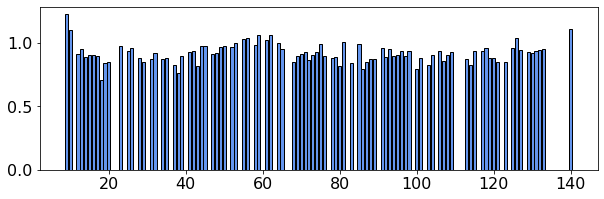

In [40]:
fig = plt.subplots(1,1,figsize=(width,height))
plt.bar(x_val_list,y_val_list,color=bar_color,edgecolor=edge_color,width=bar_width)